In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('clean_df_Medical_Appointment.csv', index_col=[0]) #index_col=[0] to avoid Unnamed 0: column

In [3]:
data.head()

,Age,Gender,DayOfTheWeek,Diabetes,Alcoolism,HiperTension,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,Status
0,19,1,2,0,0,0,0,0,0,0,29,1
1,24,0,2,0,0,0,0,0,0,0,1,1
2,4,0,1,0,0,0,0,0,0,0,1,1
3,5,1,3,0,0,0,0,0,0,1,15,1
4,38,1,1,0,0,0,0,0,0,1,6,1


In [4]:
data.shape

(299994, 12)

In [5]:
data.dtypes

Age             int64
Gender          int64
DayOfTheWeek    int64
Diabetes        int64
Alcoolism       int64
HiperTension    int64
Smokes          int64
Scholarship     int64
Tuberculosis    int64
Sms_Reminder    int64
AwaitingTime    int64
Status          int64
dtype: object

## Separating Features and target Variables

In [6]:
X = data.drop(['Status'], axis=1) #Features

y = data['Status'] #Target 

## Splitting Dataset into Training Set and Testing Set

In [7]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split


In [8]:
#creating the train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.3)

In [9]:
# distribution in training set
y_train.value_counts(normalize=True)

1    0.698398
0    0.301602
Name: Status, dtype: float64

Approx 70% of data is about patients that Shows up in training set
and 30% is about patients that does Show up at the time of their Scheduled Appointment

Text(0, 0.5, 'Frequency')

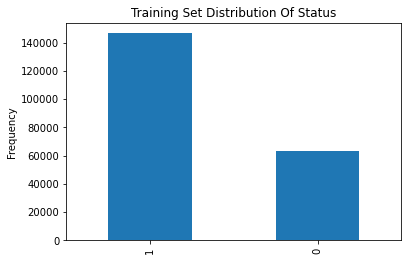

In [10]:
#Plotting Distribution Of Status in Training Set

y_train.value_counts().plot(kind='bar', title='Training Set Distribution Of Status')
plt.ylabel('Frequency')

In [11]:
# distribution in test set
y_test.value_counts(normalize=True)


1    0.695619
0    0.304381
Name: Status, dtype: float64

Text(0, 0.5, 'Frequency')

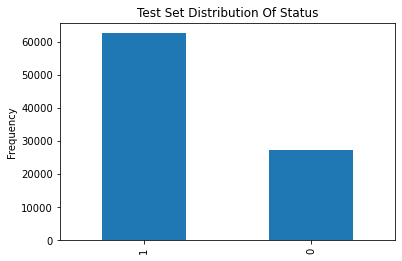

In [12]:
#Plotting Distribution Of Status in Training Set

y_test.value_counts().plot(kind='bar', title='Test Set Distribution Of Status')
plt.ylabel('Frequency')

## Defining Model Performance Function


In [13]:
from sklearn.metrics import accuracy_score

def model_performance(model_name, model ,  X_train, y_train, y_test, Y_pred):
    
    print('Model Name : ', model_name)
    
    print('Train accuracy : %.4f'% model.score(X_train, y_train) )
    
    print ('Test accuracy (Accuracy Score) : %.4f' % accuracy_score(y_test, Y_pred ) )
    


## Building Decision Tree Classifier Using Default Parameters

In [14]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [15]:
#Fitting the decision Tree Model

dt_clf_0 = DecisionTreeClassifier()
dt_clf_0.fit(X_train, y_train)


DecisionTreeClassifier()

In [16]:
dt_clf_0.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [17]:
#Predicting on test set

y_pred = dt_clf_0.predict(X_test) 

In [18]:
model_performance('Decision tree classifier', dt_clf_0, X_train, y_train, y_test,y_pred)


Model Name :  Decision tree classifier
Train accuracy : 0.8153
Test accuracy (Accuracy Score) : 0.6180


In [33]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix



array([[ 7782, 19612],
       [14767, 47838]])

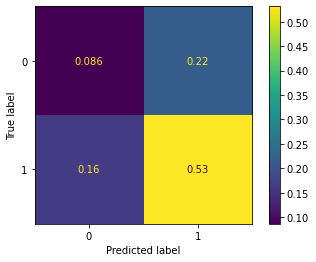

In [39]:
plot_confusion_matrix(dt_clf_0, X_test, y_test, normalize='all')
confusion_matrix(y_test, y_pred)

In [32]:
X_test.shape

(89999, 11)

In [41]:
y_test.value_counts(normalize=True)

1    0.695619
0    0.304381
Name: Status, dtype: float64

## Visualizing Decision Tree Using GraphViz Library

In [19]:
from sklearn import tree

In [20]:
# !pip install graphviz

In [21]:
decision_tree = tree.export_graphviz(dt_clf_0,out_file='tree_clf_0.dot',feature_names=X_train.columns,
                                     max_depth=2, filled=True, class_names=['Not Show Up','Show Up'], 
                                     leaves_parallel= True, proportion=False)

In [22]:
!dot -Tpng tree_clf_0.dot -o tree_clf_0.png #sudo apt install graphviz (Run Perfectly)

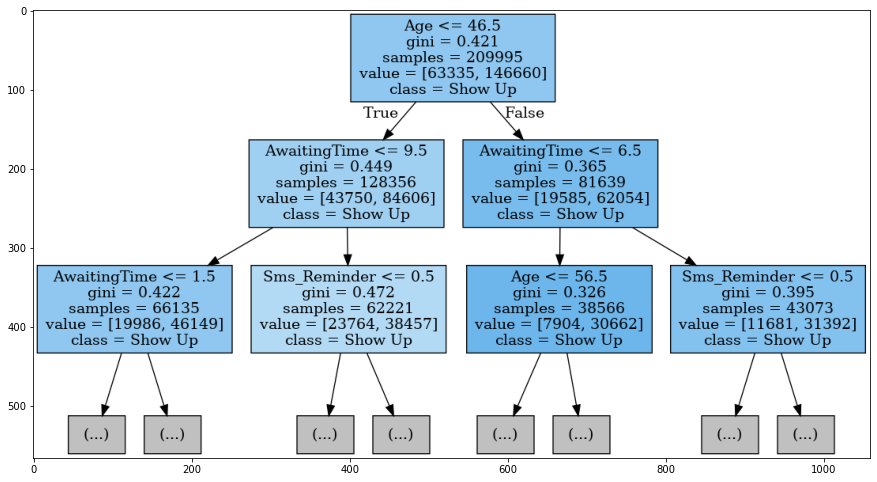

In [23]:
image = plt.imread('tree_clf_0.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

## Attributes of Decision Tree Build Using Default Parameters

In [24]:
dt_clf_0.get_depth()# The tree build is having a max depth of 37

37

In [25]:
dt_clf_0.feature_importances_

array([0.32862872, 0.06423479, 0.15202988, 0.03800743, 0.01207212,
       0.05662712, 0.01364187, 0.02836555, 0.000913  , 0.01450676,
       0.29097276])

In [26]:
feature_imp = dict(zip(X_train.columns, dt_clf_0.feature_importances_))

In [27]:
feature_imp

{'Age': 0.32862872186056313,
 'Gender': 0.06423478597691809,
 'DayOfTheWeek': 0.15202987741791466,
 'Diabetes': 0.038007430015295954,
 'Alcoolism': 0.012072122962681647,
 'HiperTension': 0.0566271197673678,
 'Smokes': 0.013641866447529913,
 'Scholarship': 0.02836555343904384,
 'Tuberculosis': 0.0009129987783437075,
 'Sms_Reminder': 0.014506764749105039,
 'AwaitingTime': 0.2909727585852362}

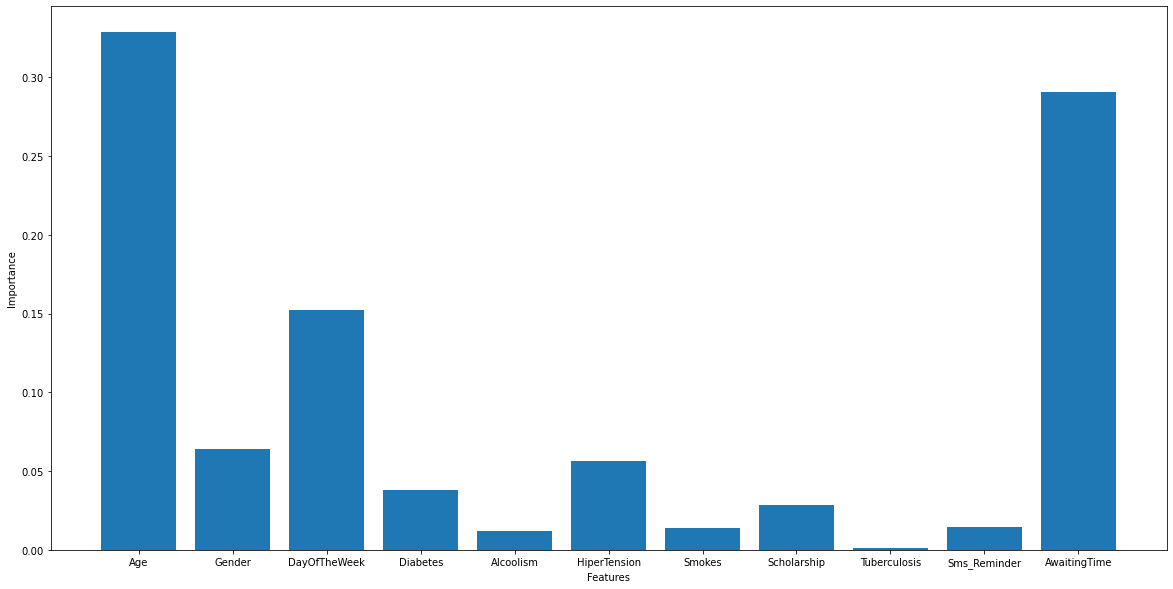

In [28]:
feature_name = list(feature_imp.keys()) 
values = list(feature_imp.values())
   
fig = plt.figure(figsize = (20, 10)) 
  
# creating the bar plot 
plt.bar(feature_name, values) 
  
plt.xlabel("Features") 
plt.ylabel("Importance")  
plt.show() 